# Open the Data

In [36]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
#open the data files
cabdata = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customers = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv("Transaction_ID.csv")

In [38]:
# print the shape of dataset
print("shape of Cab_Data", cabdata.shape)
print("shape of Customer_ID", customers.shape)
print("shape of Transaction_ID", transactions.shape)
print("shape of City Data", city.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [39]:
# print the basic info
print(cabdata.info())
print(customers.info())
print(transactions.info())
print(city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

# Data Cleaning

In [40]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [41]:
cabdata['Date of Travel']=cabdata['Date of Travel'].apply(lambda x:to_date_format(x))

In [42]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)


In [43]:
for col in cabdata.columns:
    if ' ' in col:
        cabdata = cabdata.rename(columns={col:col.replace(' ','_')})

In [44]:
for col in transactions.columns:
    if ' ' in col:
        transactions = transactions.rename(columns={col:col.replace(' ','_')})

In [45]:
for col in customers.columns:
    if ' ' in col:
        customers = customers.rename(columns={col:col.replace(' ','_')})

In [46]:
merged= pd.merge(left=transactions, right=cabdata , left_on='Transaction_ID', right_on='Transaction_ID')
merged= pd.merge(left=merged, right=customers, left_on='Customer_ID', right_on='Customer_ID')



In [47]:
merged=merged.sort_values(by=['Date_of_Travel'])
merged=merged.reset_index(drop= True )

In [48]:
merged.isnull().sum().sum()


0

In [49]:
merged

,Transaction_ID,Customer_ID,Payment_Mode,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Gender,Age,Income_(USD/Month)
0,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,Male,31,23320
1,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926
2,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548
3,10001242,14513,Card,2016-01-01,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,Male,62,3892
4,10000434,59961,Card,2016-01-01,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,Male,61,12377
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10434955,7207,Card,2018-12-30,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,Male,26,8194
359388,10438162,4263,Card,2018-12-30,Yellow Cab,CHICAGO IL,34.72,472.05,433.3056,Male,36,19488
359389,10434149,35933,Card,2018-12-30,Yellow Cab,AUSTIN TX,9.70,156.60,118.7280,Male,49,13189
359390,10434649,4624,Cash,2018-12-30,Yellow Cab,CHICAGO IL,24.24,344.50,340.3296,Female,63,5951


In [50]:
merged['Profit'] = merged['Price_Charged'] - merged['Cost_of_Trip']
merged['month'] = pd.DatetimeIndex(merged['Date_of_Travel']).month
merged['year'] = pd.DatetimeIndex(merged['Date_of_Travel']).year

In [51]:
merged

,Transaction_ID,Customer_ID,Payment_Mode,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Gender,Age,Income_(USD/Month),Profit,month,year
0,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,Male,31,23320,194.9500,1,2016
1,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926,122.0660,1,2016
2,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,164.9960,1,2016
3,10001242,14513,Card,2016-01-01,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,Male,62,3892,418.6236,1,2016
4,10000434,59961,Card,2016-01-01,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,Male,61,12377,406.4948,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10434955,7207,Card,2018-12-30,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,Male,26,8194,88.3948,12,2018
359388,10438162,4263,Card,2018-12-30,Yellow Cab,CHICAGO IL,34.72,472.05,433.3056,Male,36,19488,38.7444,12,2018
359389,10434149,35933,Card,2018-12-30,Yellow Cab,AUSTIN TX,9.70,156.60,118.7280,Male,49,13189,37.8720,12,2018
359390,10434649,4624,Cash,2018-12-30,Yellow Cab,CHICAGO IL,24.24,344.50,340.3296,Female,63,5951,4.1704,12,2018


# Seasonal Analysis 

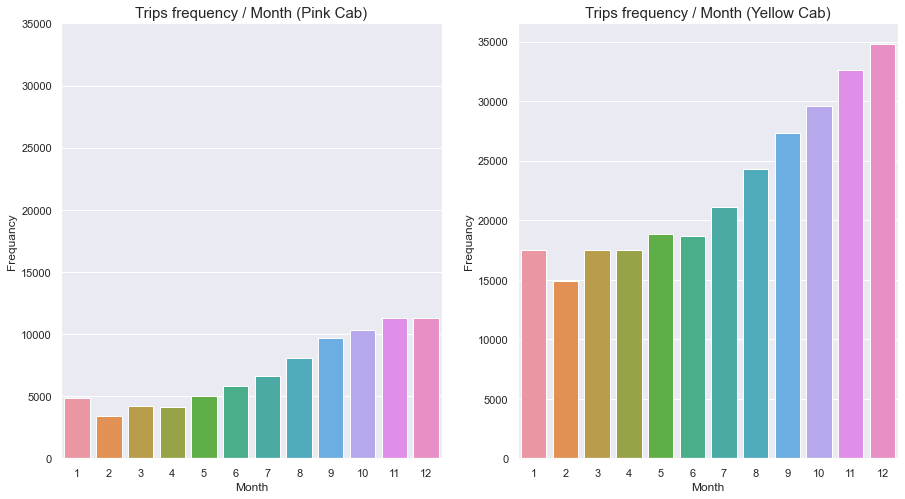

In [126]:
monthly_Transactions_pink = merged[merged.Company=='Pink Cab'].groupby(['month']).Transaction_ID.count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
sns.barplot(x=monthly_Transactions_pink.index,y=monthly_Transactions_pink.values, ax=ax1)
ax1.set_title('Trips frequency / Month (Pink Cab)',fontsize = 15)
plt.setp(ax1, xlabel='Month')
plt.setp(ax1, ylabel='Frequancy')


monthly_Transactions_yellow = merged[merged.Company=='Yellow Cab'].groupby(['month']).Transaction_ID.count()
sns.barplot(x=monthly_Transactions_yellow.index,y=monthly_Transactions_yellow.values, ax=ax2)
ax2.set_title('Trips frequency / Month (Yellow Cab)',fontsize = 15)
plt.setp(ax2, xlabel='Month')
plt.setp(ax2, ylabel='Frequancy')
ax1.set_ylim([0, 35000])
plt.show()

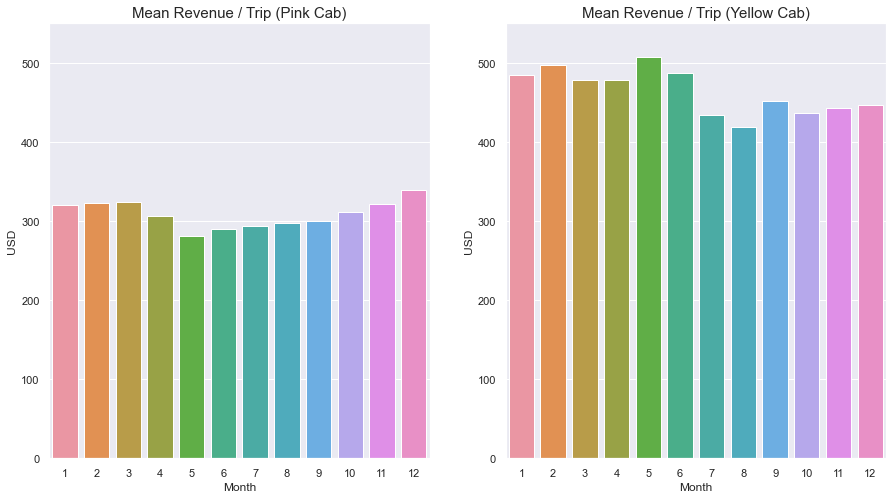

In [127]:
monthly_Revenue_pink  = merged[merged.Company=='Pink Cab'].groupby(['month']).Price_Charged.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
sns.barplot(x=monthly_Revenue_pink.index,y=monthly_Revenue_pink.values, ax=ax1)
ax1.set_title('Mean Revenue / Trip (Pink Cab)',fontsize = 15)
plt.setp(ax1, xlabel='Month')
plt.setp(ax1, ylabel='USD')


monthly_Profit_yellow = merged[merged.Company=='Yellow Cab'].groupby(['month']).Price_Charged.mean()
sns.barplot(x=monthly_Profit_yellow.index,y=monthly_Profit_yellow.values, ax=ax2)
ax2.set_title('Mean Revenue / Trip (Yellow Cab)',fontsize = 15)
plt.setp(ax2, xlabel='Month')
plt.setp(ax2, ylabel='USD')
ax1.set_ylim([0, 550])
ax2.set_ylim([0, 550])

plt.show()

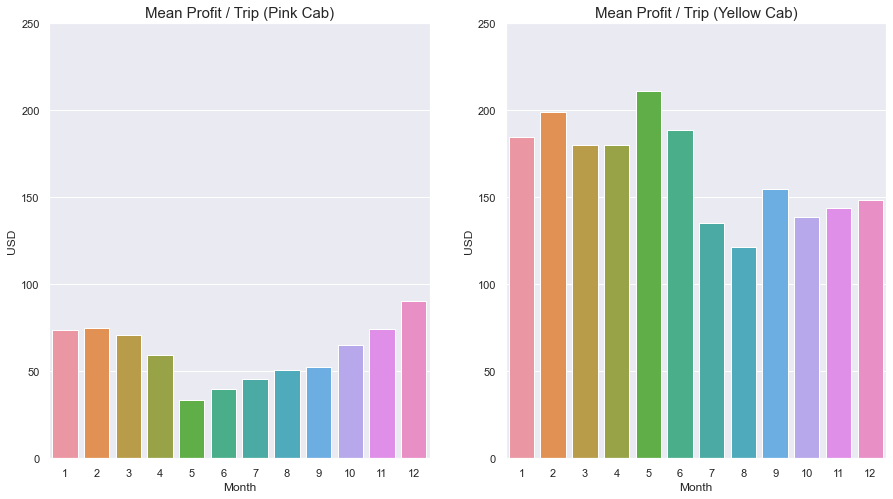

In [128]:
monthly_Profit_pink  = merged[merged.Company=='Pink Cab'].groupby(['month']).Profit.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
sns.barplot(x=monthly_Profit_pink.index,y=monthly_Profit_pink.values, ax=ax1)
ax1.set_title('Mean Profit / Trip (Pink Cab)',fontsize = 15)
plt.setp(ax1, xlabel='Month')
plt.setp(ax1, ylabel='USD')


monthly_Profit_yellow = merged[merged.Company=='Yellow Cab'].groupby(['month']).Profit.mean()
sns.barplot(x=monthly_Profit_yellow.index,y=monthly_Profit_yellow.values, ax=ax2)
ax2.set_title('Mean Profit / Trip (Yellow Cab)',fontsize = 15)
plt.setp(ax2, xlabel='Month')
plt.setp(ax2, ylabel='USD')
ax1.set_ylim([0, 250])
ax2.set_ylim([0, 250])

plt.show()

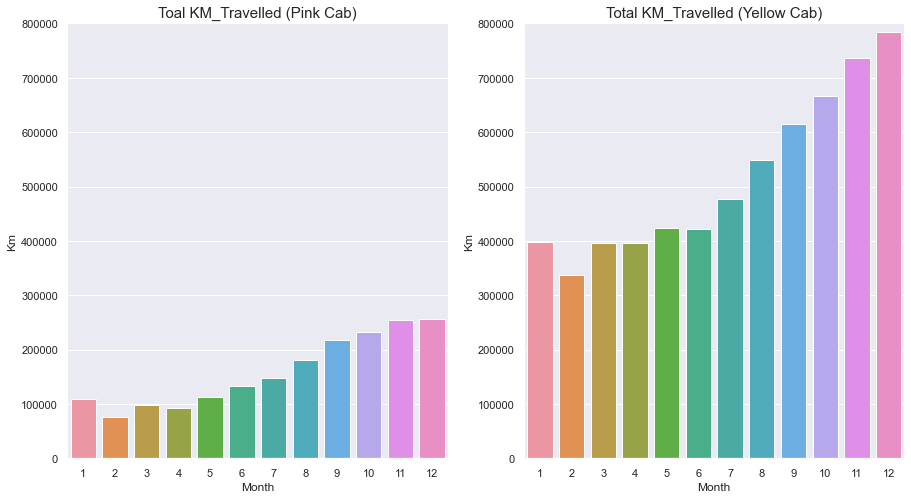

In [55]:
monthly_Profit_pink  = merged[merged.Company=='Pink Cab'].groupby(['month']).KM_Travelled.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
sns.barplot(x=monthly_Profit_pink.index,y=monthly_Profit_pink.values, ax=ax1)
ax1.set_title('Toal KM_Travelled (Pink Cab)',fontsize = 15)
plt.setp(ax1, xlabel='Month')
plt.setp(ax1, ylabel='Km')


monthly_Profit_yellow = merged[merged.Company=='Yellow Cab'].groupby(['month']).KM_Travelled.sum()
sns.barplot(x=monthly_Profit_yellow.index,y=monthly_Profit_yellow.values, ax=ax2)
ax2.set_title('Total KM_Travelled (Yellow Cab)',fontsize = 15)
plt.setp(ax2, xlabel='Month')
plt.setp(ax2, ylabel='Km')
ax1.set_ylim([0, 800000])
ax2.set_ylim([0, 800000])

plt.show()

In [56]:
# monthly_Profit_pink  = merged[merged.Company=='Pink Cab'].groupby(['month']).KM_Travelled.mean()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
# sns.barplot(x=monthly_Profit_pink.index,y=monthly_Profit_pink.values, ax=ax1)
# ax1.set_title('Mean KM_Travelled Profit / Trip (Pink Cab)',fontsize = 15)
# plt.setp(ax1, xlabel='Km')
# plt.setp(ax1, ylabel='Frequancy')


# monthly_Profit_yellow = merged[merged.Company=='Yellow Cab'].groupby(['month']).KM_Travelled.mean()
# sns.barplot(x=monthly_Profit_yellow.index,y=monthly_Profit_yellow.values, ax=ax2)
# ax2.set_title('Mean KM_Travelled / Trip (Yellow Cab)',fontsize = 15)
# plt.setp(ax2, xlabel='Month')
# plt.setp(ax2, ylabel='Km')
# #ax1.set_ylim([0, 11000000])
# #ax2.set_ylim([0, 11000000])

# plt.show()

# Profit  Analysis

In [57]:
Yearly_cost_pink  = merged[merged.Company=='Pink Cab'].groupby(['year' , 'month']).Cost_of_Trip.sum()
Yearly_cost_pink = Yearly_cost_pink.to_frame().reset_index()
Yearly_cost_pink['datetime'] = Yearly_cost_pink.month.astype(str) + '/' + Yearly_cost_pink.year.astype(str) 
Yearly_cost_pink.head()

,year,month,Cost_of_Trip,datetime
0,2016,1,234242.511,1/2016
1,2016,2,257799.776,2/2016
2,2016,3,311259.538,3/2016
3,2016,4,312128.418,4/2016
4,2016,5,374672.976,5/2016


In [58]:
Yearly_cost_yellow  = merged[merged.Company=='Yellow Cab'].groupby(['year' , 'month']).Cost_of_Trip.sum()
Yearly_cost_yellow = Yearly_cost_yellow.reset_index()
Yearly_cost = Yearly_cost_pink
Yearly_cost ['Pink'] = Yearly_cost_pink ['Cost_of_Trip']
Yearly_cost ['Yellow'] = Yearly_cost_yellow['Cost_of_Trip']
Yearly_cost.drop(Yearly_cost_pink.columns.difference(['Pink','Yellow' , 'datetime']), 1, inplace=True)
Yearly_cost.head()

C:\Users\omarm\AppData\Local\Temp/ipykernel_7764/1096041917.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Yearly_cost.drop(Yearly_cost_pink.columns.difference(['Pink','Yellow' , 'datetime']), 1, inplace=True)


,datetime,Pink,Yellow
0,1/2016,234242.511,1.141710e+06
1,2/2016,257799.776,1.391079e+06
2,3/2016,311259.538,1.565352e+06
3,4/2016,312128.418,1.672773e+06
4,5/2016,374672.976,1.688925e+06


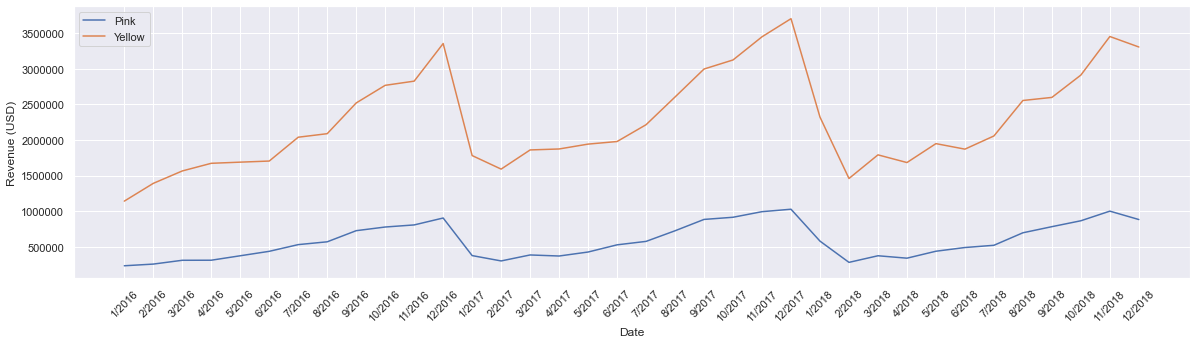

In [114]:
fig, ax = plt.subplots()
ax= sns.lineplot(x="datetime", y="Pink" ,markers=True,  data=Yearly_cost )
ax1= sns.lineplot(x="datetime", y="Yellow" ,markers=True,  data=Yearly_cost )

sns.set(rc={'figure.figsize':(20,5)}) #h v
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.legend(labels=["Pink","Yellow"])
sns.set(font_scale = 1)
sns.set(font_scale = 1)

In [60]:
Yearly_Profit_pink  = merged[merged.Company=='Pink Cab'].groupby(['year' , 'month']).Profit.sum()
Yearly_Profit_pink = Yearly_Profit_pink.to_frame().reset_index()
Yearly_Profit_pink['datetime'] = Yearly_Profit_pink.month.astype(str) + '/' + Yearly_Profit_pink.year.astype(str)

Yearly_Profit_yellow  = merged[merged.Company=='Yellow Cab'].groupby(['year' , 'month']).Profit.sum()
Yearly_Profit_yellow = Yearly_Profit_yellow.reset_index()

Yearly_Profit = Yearly_Profit_pink
Yearly_Profit ['Pink'] = Yearly_Profit_pink ['Profit']
Yearly_Profit ['Yellow'] = Yearly_Profit_yellow['Profit']
Yearly_Profit.drop(Yearly_Profit.columns.difference(['Pink','Yellow' , 'datetime']), 1, inplace=True)
Yearly_Profit.head()

C:\Users\omarm\AppData\Local\Temp/ipykernel_7764/3530325652.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Yearly_Profit.drop(Yearly_Profit.columns.difference(['Pink','Yellow' , 'datetime']), 1, inplace=True)


,datetime,Pink,Yellow
0,1/2016,74206.169,8.535861e+05
1,2/2016,88384.294,1.007479e+06
2,3/2016,88280.732,9.181432e+05
3,4/2016,86058.292,1.018717e+06
4,5/2016,57607.844,1.208193e+06


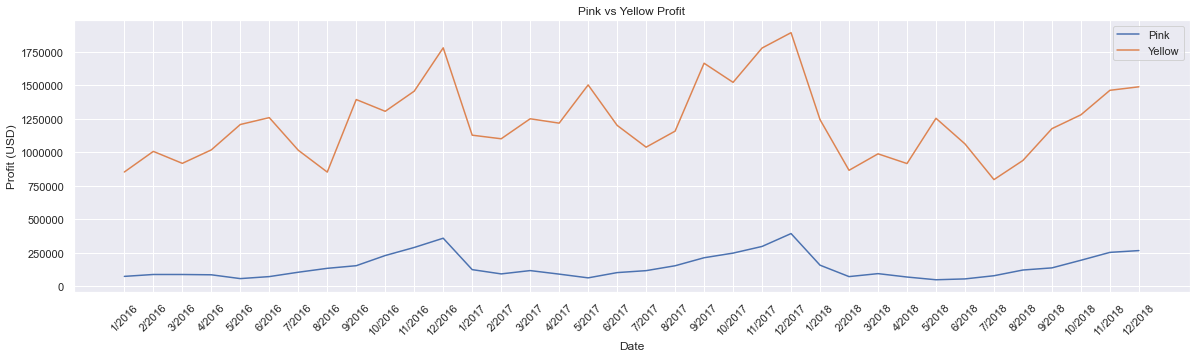

In [61]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(20,5)}) #h v
ax= sns.lineplot(x="datetime", y="Pink" ,markers=True,  data=Yearly_Profit )
ax1= sns.lineplot(x="datetime", y="Yellow" ,markers=True,  data=Yearly_Profit ).set(title='Pink vs Yellow Profit')
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("Date")
plt.ylabel("Profit (USD)")
plt.xticks(rotation=45)
plt.legend(labels=["Pink","Yellow"])
sns.set(font_scale = 1)

# Annual Growth

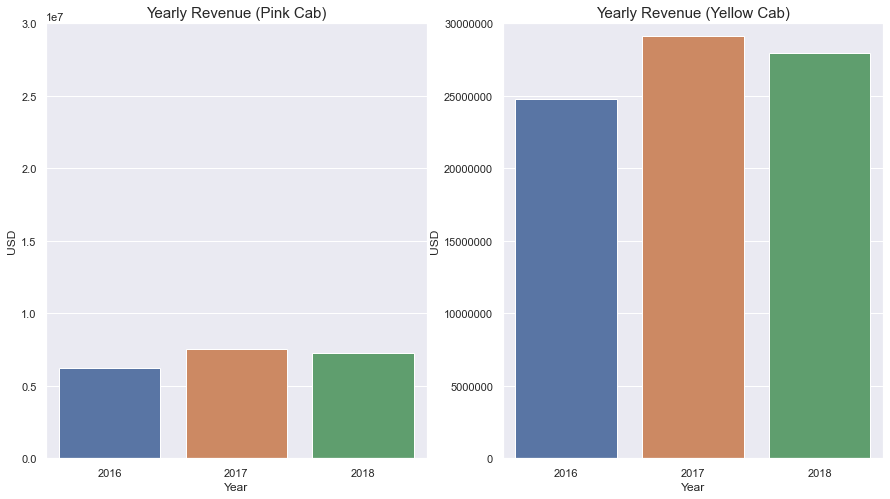

In [62]:
Yearly_Profit_pink  = merged[merged.Company=='Pink Cab'].groupby(['year']).Cost_of_Trip.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8),sharey=False)
sns.barplot(x=Yearly_Profit_pink.index,y=Yearly_Profit_pink.values, ax=ax1)
ax1.set_title('Yearly Revenue (Pink Cab)',fontsize = 15)
plt.setp(ax1, xlabel='Year')
plt.setp(ax1, ylabel='USD')


Yearly_Profit_yellow  = merged[merged.Company=='Yellow Cab'].groupby(['year']).Cost_of_Trip.sum()

sns.barplot(x=Yearly_Profit_yellow.index,y=Yearly_Profit_yellow.values, ax=ax2)
ax2.set_title('Yearly Revenue (Yellow Cab)',fontsize = 15)
plt.setp(ax2, xlabel='Year')
plt.setp(ax2, ylabel='USD')
ax1.set_ylim([0, 30000000])
ax2.set_ylim([0, 30000000])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Cities Exposure

In [63]:
Customers_city_Pink  = merged[merged.Company=='Pink Cab'].groupby(['City']).count()
Customers_city_Pink = Customers_city_Pink['Customer_ID']
Customers_city_Yellow = merged[merged.Company=='Yellow Cab'].groupby(['City']).count()
Customers_city_Yellow = Customers_city_Yellow['Customer_ID']
city_count = pd.merge(Customers_city_Pink, Customers_city_Yellow, left_index=True, right_index=True)
city_count

,Customer_ID_x,Customer_ID_y
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


No handles with labels found to put in legend.


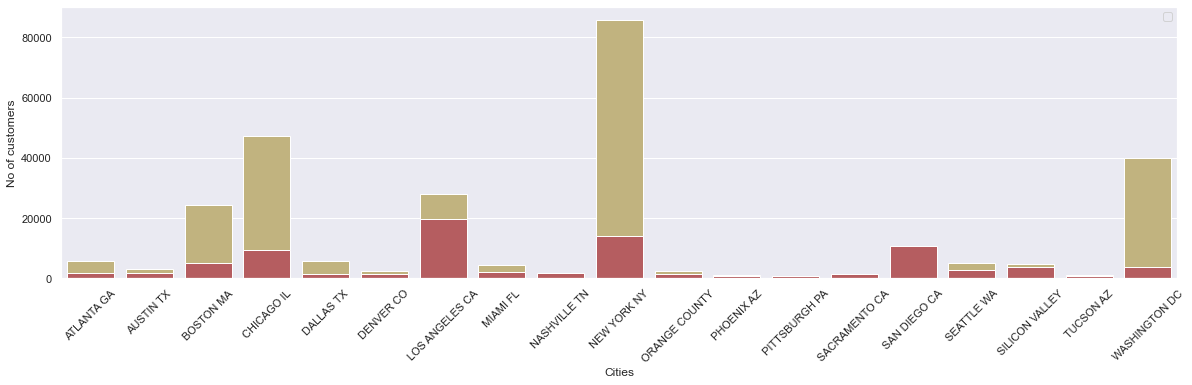

In [64]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(20,15)}) #h v
ax = sns.barplot(x=city_count.index, y=city_count["Customer_ID_y"], color='y')
ax = sns.barplot(x=city_count.index, y=city_count["Customer_ID_x"], color='r')


ax.set(xlabel="Cities", ylabel="No of customers")

# plt.xlabel("Date")
# plt.ylabel("Profit (USD)")
plt.xticks(rotation=45)

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=labs)
sns.set(font_scale = 1)

In [65]:
city_users_yellow = merged[merged.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()


In [66]:

cities_populations = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx')
cities_populations.drop(cities_populations.head(2).index, inplace=True)
new_header = cities_populations.iloc[0] #grab the first row for the header
cities_populations = cities_populations[1:] #take the data less the header row
cities_populations.columns = new_header #set the header row as the df header
cities_populations.columns = cities_populations.columns.map(str)
cities_populations["nan"]=cities_populations["nan"].str[1:]
cities_populations.set_index('nan', inplace = True)
cities_populations.drop(cities_populations.columns.difference(['2016.0','2017.0', '2018.0']), 1, inplace=True)
cities_populations.drop(cities_populations.head(5).index, inplace=True)
cities_populations.drop(cities_populations.tail(7).index, inplace=True)


C:\Users\omarm\AppData\Local\Temp/ipykernel_7764/3924616500.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cities_populations.drop(cities_populations.columns.difference(['2016.0','2017.0', '2018.0']), 1, inplace=True)


In [67]:
cities_populations

2,2016.0,2017.0,2018.0
nan,,,
Alabama,4863525.0,4874486.0,4887681.0
Alaska,741456.0,739700.0,735139.0
Arizona,6941072.0,7044008.0,7158024.0
Arkansas,2989918.0,3001345.0,3009733.0
California,39167117.0,39358497.0,39461588.0
Colorado,5539215.0,5611885.0,5691287.0
Connecticut,3578141.0,3573297.0,3571520.0
Delaware,948921.0,956823.0,965479.0
District of Columbia,685815.0,694906.0,701547.0


In [68]:
cities_populations = cities_populations.rename(index={'Georgia': 'ATLANTA GA', 'Texas':'AUSTIN TX',
                                                      'Maryland':'BOSTON MA', "Illinois":"CHICAGO IL", 
                                                      "Texas":"DALLAS TX" , "Colorado":"DENVER CO",
                                                      "California":"LOS ANGELES CA" , "Florida":"MIAMI FL" ,
                                                      "Tennessee":"NASHVILLE TN" ,"New York	":"NEW YORK NY" ,
                                                     "Connecticut":"ORANGE COUNTY ", "Arizona":"PHOENIX AZ" ,
                                                     "Pennsylvania":"PITTSBURGH PA", "California":"SACRAMENTO CA", 
                                                     "California":"SAN DIEGO CA" ,"Washington" :"SEATTLE WA",
                                                     "North Carolina":"SILICON VALLEY" , "Arizona":"TUCSON AZ","Washington" :"WASHINGTON DC"})

In [72]:
Yearly_Users_pink  = merged[merged.Company=='Pink Cab'].groupby(['City' , 'year']).Customer_ID.count()
Yearly_Users_pink = Yearly_Users_pink.to_frame().reset_index()

Yearly_Users_pink_2016 = Yearly_Users_pink[Yearly_Users_pink.year==2016].copy()
Yearly_Users_pink_2016 = pd.merge(Yearly_Users_pink_2016,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_pink_2016 ['Percentage'] = Yearly_Users_pink_2016['Customer_ID'] *100 / Yearly_Users_pink_2016 ['2016.0']

Yearly_Users_pink_2017 = Yearly_Users_pink[Yearly_Users_pink.year==2017].copy()
Yearly_Users_pink_2017 = pd.merge(Yearly_Users_pink_2017,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_pink_2017 ['Percentage'] = Yearly_Users_pink_2017['Customer_ID'] *100 / Yearly_Users_pink_2017 ['2017.0']

Yearly_Users_pink_2018 = Yearly_Users_pink[Yearly_Users_pink.year==2018].copy()
Yearly_Users_pink_2018 = pd.merge(Yearly_Users_pink_2018,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_pink_2018 ['Percentage'] = Yearly_Users_pink_2018['Customer_ID'] *100 / Yearly_Users_pink_2018 ['2018.0']
Yearly_Users_pink_2016

,City,year,Customer_ID,2016.0,2017.0,2018.0,Percentage
0,ATLANTA GA,2016,533,10301890.0,10410330.0,10511131.0,0.005174
1,BOSTON MA,2016,1540,6003323.0,6023868.0,6035802.0,0.025652
2,CHICAGO IL,2016,2800,12820527.0,12778828.0,12723071.0,0.021840
3,DALLAS TX,2016,418,27914410.0,28295273.0,28628666.0,0.001497
4,DENVER CO,2016,419,5539215.0,5611885.0,5691287.0,0.007564
5,MIAMI FL,2016,607,20613477.0,20963613.0,21244317.0,0.002945
6,NASHVILLE TN,2016,551,6646010.0,6708799.0,6771631.0,0.008291
7,PITTSBURGH PA,2016,211,12782275.0,12787641.0,12800922.0,0.001651
8,SAN DIEGO CA,2016,3199,39167117.0,39358497.0,39461588.0,0.008168
9,SILICON VALLEY,2016,1142,10154788.0,10268233.0,10381615.0,0.011246


In [73]:
Yearly_Users_yellow  = merged[merged.Company=='Yellow Cab'].groupby(['City' , 'year']).Customer_ID.count()
Yearly_Users_yellow = Yearly_Users_yellow.to_frame().reset_index()

Yearly_Users_yellow_2016 = Yearly_Users_yellow[Yearly_Users_yellow.year==2016].copy()
Yearly_Users_yellow_2016 = pd.merge(Yearly_Users_yellow_2016,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_yellow_2016 ['Percentage'] = Yearly_Users_yellow_2016['Customer_ID'] *100 / Yearly_Users_yellow_2016 ['2016.0']

Yearly_Users_yellow_2017 = Yearly_Users_yellow[Yearly_Users_yellow.year==2017].copy()
Yearly_Users_yellow_2017 = pd.merge(Yearly_Users_yellow_2017,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_yellow_2017 ['Percentage'] = Yearly_Users_yellow_2017['Customer_ID'] *100 / Yearly_Users_yellow_2017 ['2017.0']

Yearly_Users_yellow_2018 = Yearly_Users_yellow[Yearly_Users_yellow.year==2018].copy()
Yearly_Users_yellow_2018 = pd.merge(Yearly_Users_yellow_2018,cities_populations, left_on='City', right_on='nan', how='inner')
Yearly_Users_yellow_2018 ['Percentage'] = Yearly_Users_yellow_2018['Customer_ID'] *100 / Yearly_Users_yellow_2018 ['2018.0']
Yearly_Users_yellow_2016

,City,year,Customer_ID,2016.0,2017.0,2018.0,Percentage
0,ATLANTA GA,2016,1724,10301890.0,10410330.0,10511131.0,0.016735
1,BOSTON MA,2016,7435,6003323.0,6023868.0,6035802.0,0.123848
2,CHICAGO IL,2016,14127,12820527.0,12778828.0,12723071.0,0.110190
3,DALLAS TX,2016,1676,27914410.0,28295273.0,28628666.0,0.006004
4,DENVER CO,2016,718,5539215.0,5611885.0,5691287.0,0.012962
5,MIAMI FL,2016,1297,20613477.0,20963613.0,21244317.0,0.006292
6,NASHVILLE TN,2016,348,6646010.0,6708799.0,6771631.0,0.005236
7,PITTSBURGH PA,2016,195,12782275.0,12787641.0,12800922.0,0.001526
8,SAN DIEGO CA,2016,2967,39167117.0,39358497.0,39461588.0,0.007575
9,SILICON VALLEY,2016,1436,10154788.0,10268233.0,10381615.0,0.014141


[Text(0.5, 0, 'Cities'), Text(0, 0.5, 'Customers Percentage')]

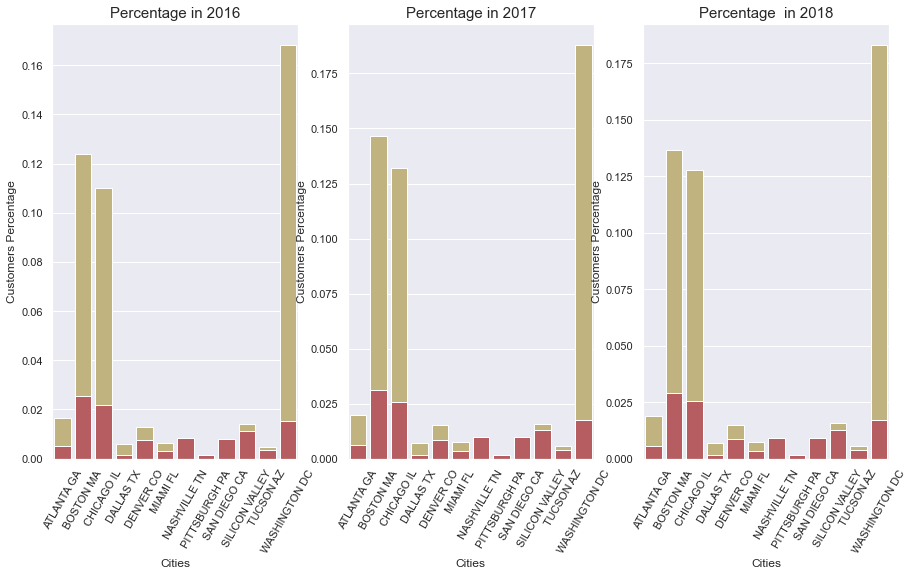

In [74]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 8),sharey=False)

sns.barplot(x=Yearly_Users_yellow_2016.City, y=Yearly_Users_yellow_2016["Percentage"], color='y' , ax=ax1)
sns.barplot(x=Yearly_Users_pink_2016.City, y=Yearly_Users_pink_2016["Percentage"], color='r' , ax=ax1)
ax1.set_title('Percentage in 2016',fontsize = 15)
plt.xticks(rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 60)
ax1.set(xlabel="Cities", ylabel="Customers Percentage")


sns.barplot(x=Yearly_Users_yellow_2017.City, y=Yearly_Users_yellow_2017["Percentage"], color='y' , ax=ax2)
sns.barplot(x=Yearly_Users_pink_2017.City, y=Yearly_Users_pink_2017["Percentage"], color='r' , ax=ax2)
ax2.set_title('Percentage in 2017',fontsize = 15)
plt.xticks(rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation = 60)
ax2.set(xlabel="Cities", ylabel="Customers Percentage")



sns.barplot(x=Yearly_Users_yellow_2018.City, y=Yearly_Users_yellow_2018["Percentage"], color='y' , ax=ax3)
sns.barplot(x=Yearly_Users_pink_2018.City, y=Yearly_Users_pink_2018["Percentage"], color='r' , ax=ax3)
ax3.set_title('Percentage  in 2018',fontsize = 15)
plt.xticks(rotation=45)
ax3.set_xticklabels(ax1.get_xticklabels(),rotation = 60)
ax3.set(xlabel="Cities", ylabel="Customers Percentage")

# Customers sigmentation and  Retntion

In [75]:
Customers_Pink = merged[merged.Company=='Pink Cab'].groupby(['Customer_ID']).count()

total_custmoers_pink = Customers_Pink.shape[0]
Pink_customer_1 = Customers_Pink[Customers_Pink.Transaction_ID != 1].shape[0] 
Pink_customer_5 = Customers_Pink[Customers_Pink.Transaction_ID  > 5].shape[0] 
Pink_customer_10 = Customers_Pink[Customers_Pink.Transaction_ID  > 10].shape[0] 



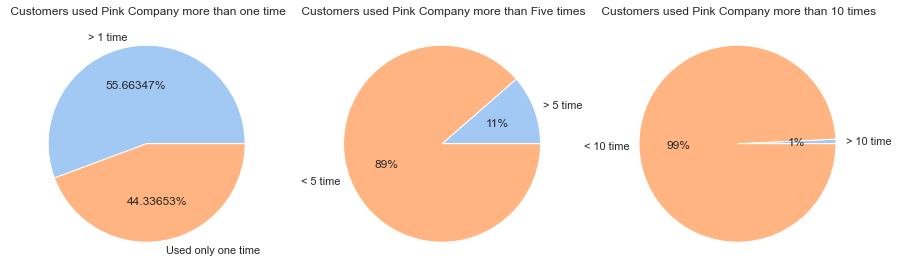

In [76]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 8),sharey=False)


colors = sns.color_palette('pastel')[0:5]
data = [Pink_customer_1 , total_custmoers_pink - Pink_customer_1]
labels = ["> 1 time" , "Used only one time"]
plt.subplot(1, 3, 1)
plt.pie(data, labels = labels, colors = colors, autopct='%.5f%%')
plt.title(" Customers used Pink Company more than one time")


colors = sns.color_palette('pastel')[0:5]
data = [Pink_customer_5 , total_custmoers_pink - Pink_customer_5]
labels = ["> 5 time" , "< 5 time"]
plt.subplot(1, 3, 2)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(" Customers used Pink Company more than Five times")

colors = sns.color_palette('pastel')[0:5]
data = [Pink_customer_10 , total_custmoers_pink - Pink_customer_10]
labels = ["> 10 time" , "< 10 time"]
plt.subplot(1, 3, 3)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(" Customers used Pink Company more than 10 times")

plt.show()


In [77]:
Customers_Yellow = merged[merged.Company=='Yellow Cab'].groupby(['Customer_ID']).count()

total_custmoers_Yellow = Customers_Yellow.shape[0]
Yellow_customer_1 = Customers_Yellow[Customers_Yellow.Transaction_ID != 1].shape[0] 
Yellow_customer_5 = Customers_Yellow[Customers_Yellow.Transaction_ID  > 5].shape[0] 
Yellow_customer_10 = Customers_Yellow[Customers_Yellow.Transaction_ID  > 10].shape[0] 

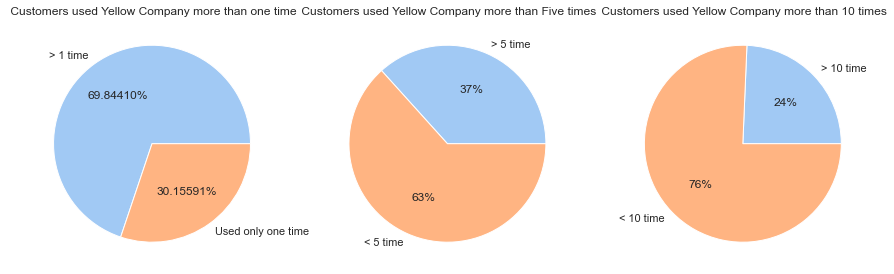

In [78]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 8),sharey=False)


colors = sns.color_palette('pastel')[0:5]
data = [Yellow_customer_1 , total_custmoers_Yellow - Yellow_customer_1]
labels = ["> 1 time" , "Used only one time"]
plt.subplot(1, 3, 1)
plt.pie(data, labels = labels, colors = colors, autopct='%.5f%%')
plt.title(" Customers used Yellow Company more than one time")


colors = sns.color_palette('pastel')[0:5]
data = [Yellow_customer_5 , total_custmoers_Yellow - Yellow_customer_5]
labels = ["> 5 time" , "< 5 time"]
plt.subplot(1, 3, 2)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(" Customers used Yellow Company more than Five times")

colors = sns.color_palette('pastel')[0:5]
data = [Yellow_customer_10 , total_custmoers_Yellow - Yellow_customer_10]
labels = ["> 10 time" , "< 10 time"]
plt.subplot(1, 3, 3)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(" Customers used Yellow Company more than 10 times")

plt.show()


In [81]:
merged

,Transaction_ID,Customer_ID,Payment_Mode,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Gender,Age,Income_(USD/Month),Profit,month,year
0,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,Male,31,23320,194.9500,1,2016
1,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926,122.0660,1,2016
2,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,164.9960,1,2016
3,10001242,14513,Card,2016-01-01,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,Male,62,3892,418.6236,1,2016
4,10000434,59961,Card,2016-01-01,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,Male,61,12377,406.4948,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10434955,7207,Card,2018-12-30,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,Male,26,8194,88.3948,12,2018
359388,10438162,4263,Card,2018-12-30,Yellow Cab,CHICAGO IL,34.72,472.05,433.3056,Male,36,19488,38.7444,12,2018
359389,10434149,35933,Card,2018-12-30,Yellow Cab,AUSTIN TX,9.70,156.60,118.7280,Male,49,13189,37.8720,12,2018
359390,10434649,4624,Cash,2018-12-30,Yellow Cab,CHICAGO IL,24.24,344.50,340.3296,Female,63,5951,4.1704,12,2018


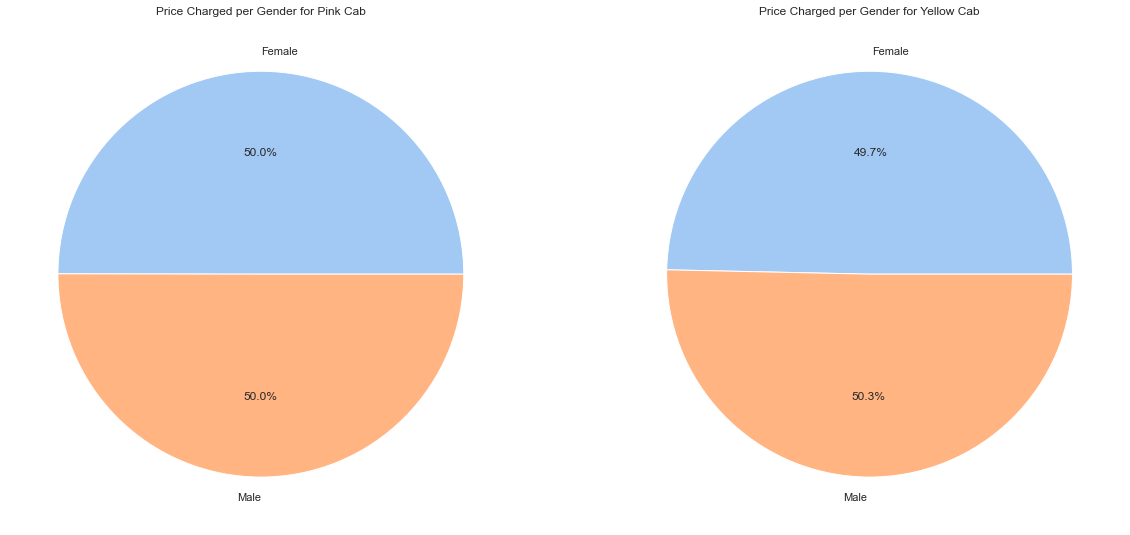

In [109]:
gender_yellow=merged[merged.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_pink=merged[merged.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()

colors = sns.color_palette('pastel')[0:5]

labs = gender_pink.index
vals = gender_pink.values
plt.subplot(1, 2, 1)
plt.pie(vals, labels = labs, colors = colors, autopct='%1.1f%%')
plt.title("Price Charged per Gender for Pink Cab")


labs = gender_yellow.index
vals = gender_yellow.values
plt.subplot(1, 2, 2)
plt.pie(vals, labels = labs, colors = colors, autopct='%1.1f%%')
plt.title("Price Charged per Gender for Yellow Cab")


plt.show()

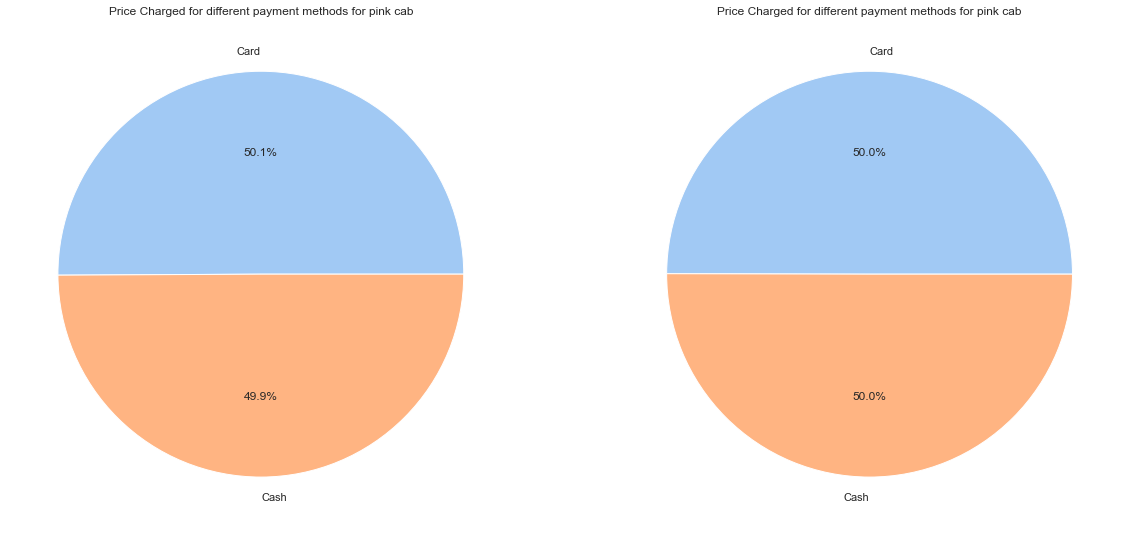

In [112]:
gender_yellow=merged[merged.Company=='Yellow Cab'].groupby('Payment_Mode').Price_Charged.mean()
gender_pink=merged[merged.Company=='Pink Cab'].groupby('Payment_Mode').Price_Charged.mean()

colors = sns.color_palette('pastel')[0:5]

labs = gender_pink.index
vals = gender_pink.values
plt.subplot(1, 2, 1)
plt.pie(vals, labels = labs, colors = colors, autopct='%1.1f%%')
plt.title("Price Charged for different payment methods for pink cab")


labs = gender_yellow.index
vals = gender_yellow.values
plt.subplot(1, 2, 2)
plt.pie(vals, labels = labs, colors = colors, autopct='%1.1f%%')
plt.title("Price Charged for different payment methods for pink cab")


plt.show()

# Analysis Results

After Performing an executive analysis, the final decisions are as follow:

1- Yellow company has higher profit than the pink company

2- Both companies has seasonal changes in Revenues.

3- More customers who used the yellow Company preferred to use it again than customers who used the Pink company.

4- Both companies didn’t show any obvious revenue increase neither decrease in the past few years.

5- The yellow companies has shown higher profit, yet it showed higher fluctuations in the revenues. While the pink company had shown smaller profit, yet it was stable through the three year.

-The final decision is to invest in the Yellow company-
